<a href="https://colab.research.google.com/github/khalidpark/whitepaper-DeepLearning/blob/main/deep_learning_whitepapaer_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Conv2D함수 정의
def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

<img src="https://miro.medium.com/max/660/1*V5ZIZg7cGHLASKbnRbKBJQ.png">

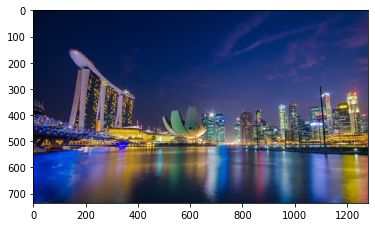

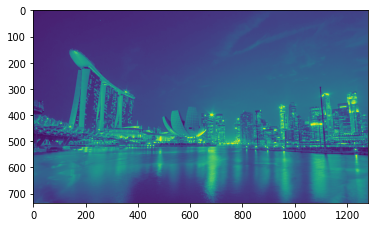

In [2]:
import sys
import requests
from io import BytesIO
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Grayscale Image
response = requests.get("https://cdn.pixabay.com/photo/2017/08/31/09/40/singapore-2699987_1280.jpg")
img = Image.open(BytesIO(response.content))
open_cv_image = np.array(img) 
open_cv_image = cv2.cvtColor(src=open_cv_image, code=cv2.COLOR_BGR2GRAY)

imgplot = plt.imshow(img)
plt.show() # original image
imgplot = plt.imshow(open_cv_image)
plt.show() # transformed image


In [3]:
# Edge Detection Kernel
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

# Convolve and Save Output
output = convolve2D(open_cv_image, kernel, padding=1)
cv2.imwrite('2DConvolved.jpg', output)

True

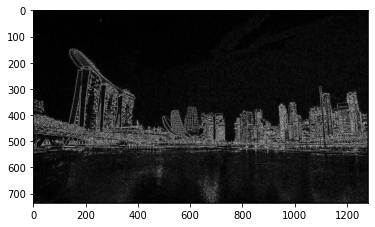

In [4]:
im = cv2.imread('2DConvolved.jpg')
imgplot = plt.imshow(im)
plt.show()